# Milestone 2

# 1. Introduction

Nama: Arnaz Tejakusuma

Batch: 012

URL: http://arnaz-frontend-p2m2.herokuapp.com

# 2. Dataset Description

Dataset yang digunakan dalam project ini merupakan kumpulan 250 CT scan daripada otak pasien yang normal dan otak pasien yang terindikasi menderita tumor. Dataset ini diperoleh dari Kaggle dan diposting oleh akun yang bernama Navoneel Chakrabarty dengan link sebagai berikut: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

## Tumor Otak

Karena project kali ini mengangkat tema tumor otak, maka pada bagian ini akan dijabarkan secara singkat mengenai tumor otak. Berdasarkan referensi dari artikel-artikel medis yang didapatkan secara online, Tumor otak diakibatkan oleh munculnya jaringan abnormal yang tumbuh didalam atau di dalam atau di sekitar otak. Munculnya tumor otak dapat berasal dari jaringan otak itu sendiri atau berasal dari organ lain yang kemudian menyebar ke otak.

Tumor otak ada yang bersifat jinak maupun ganas, berikut adalah contoh-contoh tumor otak berdasarkan sifatnya:

- Meningioma (jinak): Merupakan kasus yang paling sering ditemukan. Tumor ini tumbuh pada lapisan pelindung otak yang disebut dengan meninges.

- Neuroma Akustik (jinak): Merupakan tumor yang tumbuh pada saraf vestibular atau saraf yang mengarah dari telinga bagian dalam ke otak.

- Adenoma Hipofisis (jinak): Tumor yang terbentuk di kelenjar hipofisis yang terletak di dasar otak.

- Glioma (ganas): Sering juga dikenal dengan nama Glioblastoma.Tumor jenis ini berkembang pada sel glia yang mengelilingi dan membantu sel saraf.

- Medulloblastoma (ganas): Tumor yang pertumbuhannya sangat cepat, terbentuk di dasar tengkorak. Kasus ini umum dialami oleh anak-anak.

Gejala tumor otak yang dialami pasien tentunya berbeda-beda. Karena tergantung jenis, ukuran, kecepatan pertumbuhan, dan lokasi tumor. Namun, gejala awal yang cukup umum dialami oleh penderita tumor otak adalah sakit kepala, kejang, perubahan suasana hati, mudah lupa dan merasa bingung, mudah lelah, mual, dan muntah. 

Hingga saat ini belum diketahui secara pasti faktor-faktor yang dapat menyebabkan terjadinya tumor otak. Namun ada beberapa faktor yang dapat meningkatkan risiko seseorang terkena tumor otak, yaitu:

- Usia
- Keturunan
- Kondisi medis yang menyebabkan pasien menjalani radioterapi

Cara pencegahan tumor otak yang paling mudah adalah denga menjaga pola hidup sehat dan tentunya selalu waspada untuk melakukan pemeriksaan dini jika ada anggota keluarga yang menderita tumor otak atau mengalami gejala klinis.


Sumber: https://www.rskariadi.co.id/news/233/Lebih-Tahu-Tentang-Tumor-Otak/Artikel

https://www.emc.id/id/care-plus/tumor-otak-penyebab-dan-penanganannya

https://health.kompas.com/read/2020/09/26/090300468/8-gejala-awal-tumor-otak-yang-perlu-diwaspadai?page=all

https://www.alodokter.com/tumor-otak


# 3. Objectives

Project ini merupakan Milestone 2 di Fase 2 Program FTDS. Project ini dibuat dengan tujuan mengevaluasi pemahaman mengenai materi Deep Learning, khususnya Convolutional Neural Network (CNN). Melalui project ini, peserta diharapkan dapat:

- Mampu memahami konsep Computer Vision/NLP
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP
- Mampu mengimplementasikan Artificial Neural Network dengan data yang ada
- Mampu menganalisis dan menjelaskan layer yang dibuat

Tujuan project ini adalah membuat sebuah model Convolutional Neural Network (CNN) yang mampu membedakan hasil CT scan otak pasien yang normal atau yang terindikasi menderita tumor otak.


# 4. Import Libraries

Dalam project ini, libraries utama yang digunakan adalah Pandas, Numpy, Matplotlib, Seaborn, Tensorflow, Scikit-Learn, dan Keras.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
import random
import os
import warnings

from google.colab import drive
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
import requests
from PIL import Image
from io import BytesIO

warnings.filterwarnings("ignore")

# 5. Data Loading

Karena pengerjaan project kali ini menggunakan notebook Google Colab, maka proses load data sedikit berbeda dengan proses load data apabila menggunakan notebook Visual Studio Code. 

Apabila pengerjaan project dilakukan menggunakan Google Colab, proses load data akan lebih mudah bila dataset diupload terlebih dahulu ke Google Drive. Kemudian kita tinggal menggunakan syntax untuk mount Google Drive dan masuk dalam folder yang memuat dataset project. Selanjutnya kita juga perlu membuat directory folder yang dimuat dalam variabel agar data atau informasi dalam folder tersebut dapat dipanggil ketika dibutuhkan.

## 5.1 Mount Google Drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 5.2 Mengakses Folder Dataset

In [ ]:
# Masuk folder "brain_tumor_cnn"
% cd /content/gdrive/MyDrive/brain_tumor_cnn

/content/gdrive/MyDrive/brain_tumor_cnn


## 5.3 Membuat Directory Folder

In [ ]:
train_dir = 'deep_learning/train'
test_dir = 'deep_learning/test'

# 6. Exploratory Data Analysis

## 6.1 Ekstrak Nama Kelas

In [ ]:
# Ekstrak nama kelas
data_dir = pathlib.Path('deep_learning/train')
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['no' 'yes']


Untuk project ini hanya ada dua kelas yaitu "yes" dan "no" saja.

Dimana kelas "yes" mewakili foto-foto CT scan pasien yang terindikasi menderita tumor otak, sedangkan kelas "no" mewakili foto-foto CT scan otak pasien yang normal atau tidak terindikasi menderita tumor otak.

## 6.2 Cek Isi Folder Train

In [ ]:
# Cek apakah pada masing-masing folder ada berapa foto CT scan
for dirpath, dirnames, filenames in os.walk('deep_learning/train'):
 print(f"Ada {len(dirnames)} folder dan ada {len(filenames)} file di dalam {dirpath}")

Ada 2 folder dan ada 0 file di dalam deep_learning/train
Ada 0 folder dan ada 88 file di dalam deep_learning/train/no
Ada 0 folder dan ada 145 file di dalam deep_learning/train/yes


Dalam folder train terdapat dua folder yang berjudul yes dan no.

Dalam Folder no terdapat 88 foto CT scan pasien yang normal atau tidak menderita tumor otak.

Dalam folder yes terdapat 145 foto CT scan pasien yang terindikasi menderita tumor otak.

Darisini terlihat bahwa dataset ini sebenarnya tidak berimbang, karena jumlah CT scan pasien yang menderita  tumor jumlahnya jauh lebih banyak dariapda jumlah CT scan otak pasien normal. Namun demikian, dataset ini tetap akan digunakan, tetapi perlu diingat bahwa dataset yang tidak berimbang berpotensi untuk menghasilkan model yang yang bias atau memfavoritkan salah satu kelas dibandingkan kelas lainnya. Untuk mengantisipasi hal ini akan disiapkan data yang sudah melalui proses augmentasi, untuk kemudian dibandingkan hasilnya dengan data yang murni.


## 6.3 Cek ini Folder Test

In [ ]:
# Cek apakah pada masing-masing folder ada berapa foto CT scan
for dirpath, dirnames, filenames in os.walk('deep_learning/test'):
 print(f"Ada {len(dirnames)} folder dan ada {len(filenames)} file di dalam {dirpath}")

Ada 2 folder dan ada 0 file di dalam deep_learning/test
Ada 0 folder dan ada 10 file di dalam deep_learning/test/no
Ada 0 folder dan ada 10 file di dalam deep_learning/test/yes


Dalam folder test terdapat dua folder yang berjudul yes dan no.

Dalam Folder no terdapat 10 foto CT scan pasien yang normal atau tidak menderita tumor otak.

Dalam folder yes terdapat 10 foto CT scan pasien yang terindikasi menderita tumor otak.


## 6.4 Menampilkan Sample CT Scan

### 6.4.1 Membuat Fungsi untuk Menampilkan Foto CT Scan

In [ ]:
# View image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img

### 6.4.2 Contoh Hasil CT Scan Pasien yang Normal

Image Shape : (251, 201, 3)


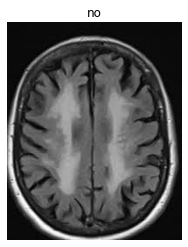

In [ ]:
img = view_random_image(target_dir = 'deep_learning/train/',
                        target_class = 'no')

Berdasarkan gambar diatas, artinya directory yang dibuat sudah benar dan berhasil menunjukkan CT scan otak manusia yang normal.

Image Shape : (454, 442, 4)
Image Shape : (225, 225)
Image Shape : (326, 276, 3)
Image Shape : (242, 208, 3)
Image Shape : (750, 750)
Image Shape : (1024, 1024)
Image Shape : (225, 225)
Image Shape : (242, 208, 3)
Image Shape : (225, 225, 3)
Image Shape : (198, 150, 3)


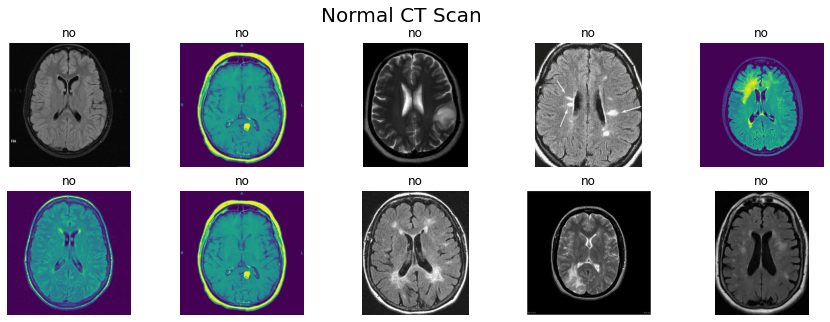

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle('Normal CT Scan', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = view_random_image(target_dir = 'deep_learning/train/',
                        target_class = 'no')
    plt.axis('off')
plt.show()

Seperti yang dapat dilihat dari foto-foto CT scan diatas, pada otak pasien yang normal tidak terdapat adanya benda asing atau jaringan abnormal. Seluruh bagian otak seperti lobus frontalis, lobus parietal, lobus temporal, dan lobus oksipital terlihat bersih dan sehat.

### 6.4.3 Hasil CT Scan yang Terindikasi Tumor

Image Shape : (630, 630, 3)


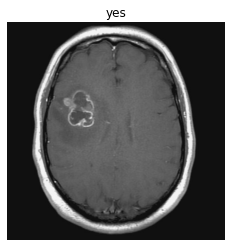

In [ ]:
img = view_random_image(target_dir = 'deep_learning/train/',
                        target_class = 'yes')

Berdasarkan gambar diatas, artinya directory yang dibuat sudah benar dan berhasil menunjukkan CT scan otak yang terindikasi menderita tumor.

Image Shape : (279, 258, 3)
Image Shape : (290, 250, 3)
Image Shape : (353, 300, 3)
Image Shape : (630, 587, 3)
Image Shape : (357, 283, 3)
Image Shape : (357, 283, 3)
Image Shape : (279, 258, 3)
Image Shape : (325, 254, 3)
Image Shape : (630, 630, 3)
Image Shape : (351, 262, 3)


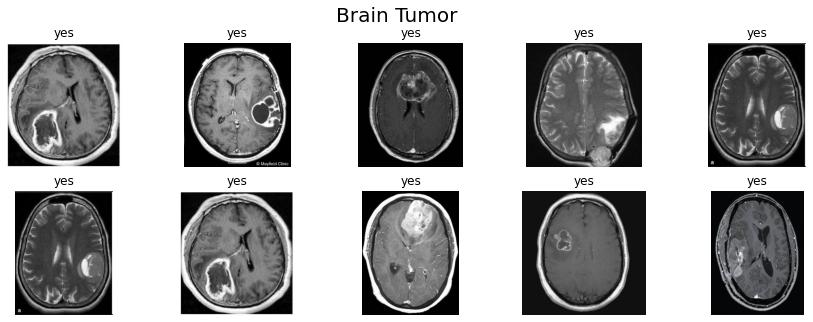

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle('Brain Tumor', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = view_random_image(target_dir = 'deep_learning/train/',
                        target_class = 'yes')
    plt.axis('off')
plt.show()

Seperti yang dapat dilihat dari foto-foto CT scan diatas, pada otak pasien yang terindikasi menderita tumor, dapat terlihat jelas adanya benda asing atau pertumbuhan jaringan yang tidak normal. Foto-foto CT scan juga menunjukkan ada pasien yang menderita tumor pada bagian lobus frontalis, lobus oksipital, atau ventrikel lateralis. Ukuran Tumornya juga bervariasi, ada yang terlihat cukup kecil dan ada juga yang sudah cukup besar.

# 7. Data Preprocessing

Pada proses ini, foto-foto CT scan akan dimasukan kedalam model menggunakan ImageDataGenerator. Dalam hal ini ImageDataGenerator membantu kita untuk mentransformasi foto-foto CT scan kedalam bentuk yang dapat terbaca oleh model. 

Untuk project ini, baik test dan train set rescalenya adalah 1/255.0

sedangkan untuk parameter trainnya, foto-foto akan diresize menjadi ukuran 224X224. Masing-masing batch terdiri dari 16 foto, jumlah yang seharusnya pas mengingat ukuran datatset yang tidak terlalu besar. Class mode yang digunakan adalah binary karena hasil yang diharapkan hanya terbagi dalam dua kelas yaitu yes atau no.

Selain itu saya juga menyiapkan variabel untuk menampung foto-foto CT scan yang telah melewati proses augmentasi. Data yang sudah diaugmentasi ini akan masukkan juga kedalam model sebagai pembanding. Untuk project ini, parameter yang saya gunakan adalah:

- rescale = 1/255.0
- rotation_range = 0.2
- zoom_range = 0.2
- width_shift_range = 0.2
- height_shift_range = 0.2
- horizontal_flip = True

In [ ]:
# Set random seed
tf.random.set_seed(17)

# Preprocess train dan test data
train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

# Membuat variabel untuk augmented object
train_datagen_augmented = ImageDataGenerator(rescale = 1 / 255.0,
                                             rotation_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip=True)

# Gunakan object datagen
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=46)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=46)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=46,
                                               shuffle=False)

Found 233 images belonging to 2 classes.
Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# 8. Model Definition and Evaluation

Pada project kali ini akan dibuat dua buah model sequential. Dimana satu model merupakan model sequential biasa, sedangkan model lainnya adalah model sequential dengan data yang sudah mengalami proses augmentasi.


## 8.1 Model I (Sequential)

## 8.1.1 Model Definition

Arsitektur model ini adalah:
- Model dengan metode sequential.
- Untuk convolutional layernya digunakan Conv2D dengan 64 filter dan activationnya menggunakan relu. Input size disamakan dengan parameter di preprocessing yaitu 224X224.
- Flatten layer disini menggunakan parameter default.
- Fully connected layer dengan 64 neuron dengan activation relu.
- Output layer menggunakan activation sigmoid karena target labelnya merupakan binary class.


In [ ]:
# Model definition
model_I = Sequential()

# Convolutional pool

model_I.add(Conv2D(64, 3, activation = 'relu', input_shape = (224, 224, 3)))
model_I.add(MaxPool2D())

# Flatten layer
model_I.add(Flatten())

# Fully connected layer
model_I.add(Dense(64, activation = 'relu'))

# Output layer
model_I.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model_I.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 788544)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                50466880  
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 50,468,802
Trainable params: 50,468,802
Non-trainable params: 0
__________________________________________

### 8.1.2 Model I Training

In [ ]:
# Model compile sempat error, kemudian berhasil di-debug dengan syntax yang didapat dari stackoverflow
# Sumber: https://stackoverflow.com/questions/71357014/running-a-fine-tune-model-for-my-cnn-value-error
model_I.compile(optimizer='adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy'])

# Train model, epochs diset di angka 20 mengingat ukuran dataset yang tidak begitu besar
history_model_I = model_I.fit(train_data,
                  epochs=20,
                  validation_data=test_data)

Epoch 1/20
15/15 [==============================] - 2s 99ms/step - loss: 5.9129 - accuracy: 0.6781 - val_loss: 1.1766 - val_accuracy: 0.6500
Epoch 2/20
15/15 [==============================] - 1s 87ms/step - loss: 0.3777 - accuracy: 0.8541 - val_loss: 0.4210 - val_accuracy: 0.7500
Epoch 3/20
15/15 [==============================] - 1s 87ms/step - loss: 0.2037 - accuracy: 0.9356 - val_loss: 0.3902 - val_accuracy: 0.8000
Epoch 4/20
15/15 [==============================] - 1s 85ms/step - loss: 0.0640 - accuracy: 0.9871 - val_loss: 0.3719 - val_accuracy: 0.8500
Epoch 5/20
15/15 [==============================] - 1s 85ms/step - loss: 0.0185 - accuracy: 0.9957 - val_loss: 0.4110 - val_accuracy: 0.8500
Epoch 6/20
15/15 [==============================] - 1s 87ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.4459 - val_accuracy: 0.8500
Epoch 7/20
15/15 [==============================] - 1s 86ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8500
Epoch 8/20
15

### 8.1.3 Model I Evaluation

Model evaluation akan dilakukan dengan visualisasi loss and accuracy beserta penjelasan singkat dari visualisasinya. Kemudian akan dilakukan juga evaluasi dengan menggunakan classification report.

### Loss Curves

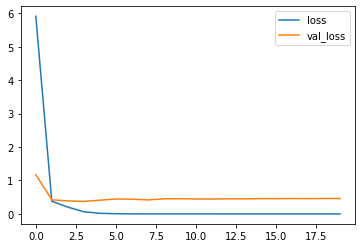

In [ ]:
metrics_loss_I = pd.DataFrame(history_model_I.history)
metrics_loss_I[["loss", "val_loss"]].plot();

Loss untuk kedua kurva berada dibawah 7%

Sempat terjadi intercept antara kedua kurva pada epochs awal-awal. namun kemudian kedua kurva kembali menjauh. 





Note: History model cenderung berubah-ubah, markdown ditulis berdasarkan pengamatan ketika notebook terakhir dirun.

### Accuracy Curves

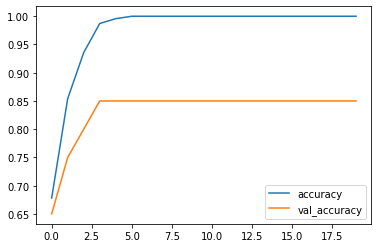

In [ ]:
metrics_acc_I = pd.DataFrame(history_model_I.history)
metrics_acc_I[["accuracy", "val_accuracy"]].plot();

Berdasarkan graph diatas, model ini mengalami overfitting. Karena pada train set akurasinya mencapai 100%, sedangkan pada test set akurasinya hanya sekitar 85%.

Meskipun demikian, kedua kurva sebenarnya mengarah ke arah yang sama. Pada epochs ke-3 sebenarnya sempat hampir terjadi intercept, namun kemudian kedua kurva kembali menjauh.

Note: History model cenderung berubah-ubah, markdown ditulis berdasarkan pengamatan ketika notebook terakhir dirun.

### Confusion Matrix

In [ ]:
res_model_I = model_I.predict(test_data)
y_test_model_I = test_data.classes
res_argmax_I = res_model_I.argmax(axis=1)
print(classification_report(y_test_model_I, res_argmax_I))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



Ketika diuji dengan test set, model ini hanya mendapatkan akurasi 85%.

Selain itu, dari precision, recall, dan f-1 score, terlihat bahwa performa model ini juga tidak stabil dan belum dapat memprediksi kedua kelas dengan baik.

Note: History model cenderung berubah-ubah, markdown ditulis berdasarkan pengamatan ketika notebook terakhir dirun.

### 8.2.1 Model II (Sequential with Augmented Data)

Arsiteksur model ini sebenarnya sama dengan model sequential biasa, namun pada data yang akan dimasukkan kedalam model ini merupakan data yang sudah mengalami proses augmentasi.

In [ ]:
# Model definition
model_II = Sequential()

# Convolutional pool

model_II.add(Conv2D(64, 3, activation = 'relu', input_shape = (224, 224, 3)))
model_II.add(MaxPool2D())

# Flatten layer
model_II.add(Flatten())

# Fully connected layer
model_II.add(Dense(64, activation = 'relu'))

# Output layer
model_II.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model_II.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 788544)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                50466880  
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 50,468,802
Trainable params: 50,468,802
Non-trainable params: 0
__________________________________________

### 8.2.2 Model II Training

In [ ]:
# Model compile sempat error, kemudian berhasil di-debug dengan syntax yang didapat dari stackoverflow
# Sumber: https://stackoverflow.com/questions/71357014/running-a-fine-tune-model-for-my-cnn-value-error
model_II.compile(optimizer='adam',
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 metrics=['accuracy'])

# Train model
history_model_II = model_II.fit(train_data_augmented,
                  epochs=20,
                  validation_data=test_data)

Epoch 1/20
15/15 [==============================] - 4s 240ms/step - loss: 7.9688 - accuracy: 0.5279 - val_loss: 0.9556 - val_accuracy: 0.5000
Epoch 2/20
15/15 [==============================] - 3s 226ms/step - loss: 1.0450 - accuracy: 0.6223 - val_loss: 0.6649 - val_accuracy: 0.5000
Epoch 3/20
15/15 [==============================] - 3s 224ms/step - loss: 0.7051 - accuracy: 0.5622 - val_loss: 0.6641 - val_accuracy: 0.5000
Epoch 4/20
15/15 [==============================] - 3s 225ms/step - loss: 0.6233 - accuracy: 0.6567 - val_loss: 0.6628 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 3s 225ms/step - loss: 0.6161 - accuracy: 0.6695 - val_loss: 0.6145 - val_accuracy: 0.8000
Epoch 6/20
15/15 [==============================] - 3s 227ms/step - loss: 0.5933 - accuracy: 0.6953 - val_loss: 0.5626 - val_accuracy: 0.7500
Epoch 7/20
15/15 [==============================] - 3s 226ms/step - loss: 0.5872 - accuracy: 0.6824 - val_loss: 0.5803 - val_accuracy: 0.7000
Epoch 

### 8.2.3 Model II Evaluation

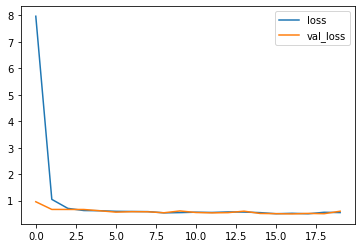

In [ ]:
metrics_loss_II = pd.DataFrame(history_model_II.history)
metrics_loss_II[["loss", "val_loss"]].plot();

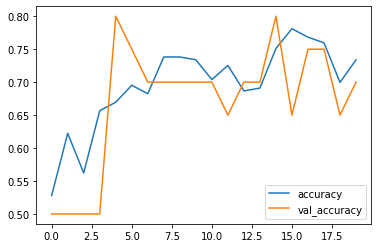

In [ ]:
metrics_acc_II = pd.DataFrame(history_model_II.history)
metrics_acc_II[["accuracy", "val_accuracy"]].plot();

In [ ]:
res_model_II = model_II.predict(test_data)
y_test_model_II = test_data.classes
res_argmax_II = res_model_II.argmax(axis=1)
print(classification_report(y_test_model_II, res_argmax_II))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.62      1.00      0.77        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20



Cukup menarik bahwa data yang telah mengalami proses augmentasi ternyata justru hasil evaluasinya tidak lebih baik daripada data yang tidak mengalami proses augmentasi. Berdasarkan hasil evaluasi diatas, ternyata model yang menggunakan augmented data justru performanya tidak lebih baik daripada model sequential biasa.

Model menghasilkan accuracy 0.73 dengan loss 0.54 pada train setnya, sedangkan pada test setnya accuracy 0.70 dengan loss 0.59. 

Sebenarnya model ini merupakan good fit karena baik hasil train dan test setnya berimbang. Namun tingkat kesalahan model ini cukup tinggi dan mengingat model ini akan digunakan untuk prediksi tumor otak, maka model ini masih belum cukup baik untuk digunakan. 

Note: History model cenderung berubah-ubah, markdown ditulis berdasarkan pengamatan ketika notebook terakhir dirun.

# 9. Model Improvement

Karena kedua model yang sudah dibuat belum ada yang memuaskan performanya, dimana satu model mengalami overfitting dan model lainnya memiliki tingkat loss yang tinggi, maka akan dilakukan model improvement dengan pretrained model ResNet50V2. Pertimbangan menggunakan model ResNet50V2 karena berdasarkan riset, cukup banyak orang yang membuat image classification bertema medis termasuk brain tumor prediction dengan menggunakan model ResNet50V2.

Sumber: https://www.kaggle.com/code/gauravduttakiit/tumor-or-not-using-resnet-50-v2/notebook

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9720964

https://aip.scitation.org/doi/abs/10.1063/5.0082328



In [ ]:
# Load pretrained model
base_model = ResNet50V2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze model
base_model.trainable = False

In [ ]:
# Mendefinisikan model dan layer-layernya
model_tl = Sequential()
model_tl.add(base_model)
model_tl.add(GlobalAveragePooling2D())
model_tl.add(Flatten())
model_tl.add(Dropout(0.2))
model_tl.add(Dense(16, activation='relu'))
model_tl.add(Dense(2, activation='sigmoid'))

# Model compile
model_tl.compile(optimizer='adam',
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 metrics=['accuracy'])

In [ ]:
# Model summary
model_tl.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 16)                32784     
                                                                 
 dense_15 (Dense)            (None, 2)                 34        
                                                      

In [ ]:
# Train model
history_tl = model_tl.fit(train_data,
                  epochs=40,
                  validation_data=test_data)

Epoch 1/40
15/15 [==============================] - 6s 150ms/step - loss: 0.6060 - accuracy: 0.6824 - val_loss: 0.3979 - val_accuracy: 0.8000
Epoch 2/40
15/15 [==============================] - 1s 93ms/step - loss: 0.3668 - accuracy: 0.8197 - val_loss: 0.2568 - val_accuracy: 0.8500
Epoch 3/40
15/15 [==============================] - 1s 94ms/step - loss: 0.2734 - accuracy: 0.8927 - val_loss: 0.1775 - val_accuracy: 0.9500
Epoch 4/40
15/15 [==============================] - 1s 90ms/step - loss: 0.2115 - accuracy: 0.9142 - val_loss: 0.1962 - val_accuracy: 0.9000
Epoch 5/40
15/15 [==============================] - 1s 90ms/step - loss: 0.1684 - accuracy: 0.9399 - val_loss: 0.1134 - val_accuracy: 1.0000
Epoch 6/40
15/15 [==============================] - 1s 91ms/step - loss: 0.1481 - accuracy: 0.9571 - val_loss: 0.1122 - val_accuracy: 0.9500
Epoch 7/40
15/15 [==============================] - 1s 91ms/step - loss: 0.1438 - accuracy: 0.9442 - val_loss: 0.0816 - val_accuracy: 0.9500
Epoch 8/40
1

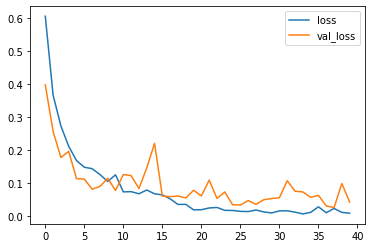

In [ ]:
# Improved model evaluation
metrics_tl = pd.DataFrame(history_tl.history)
metrics_tl[["loss", "val_loss"]].plot();

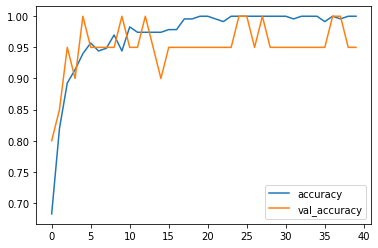

In [ ]:
# Improved model evaluation
accuracy_tl = pd.DataFrame(history_tl.history)
accuracy_tl[["accuracy", "val_accuracy"]].plot();

In [ ]:
# Improved model classification report
res_ft = model_tl.predict(test_data)
y_test = test_data.classes
res_ft = res_ft.argmax(axis=1)
print(classification_report(y_test, res_ft))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



Berdasarkan hasil evaluasi diatas, ternyata performa model transfer learning sangat baik.

Tidak terjadi overfitting, baik train dan test set accuracy scorenya mencapai minimal 95%. Selain itu kedua kurva juga bergerak kearah yang sama.

Dari kurva loss juga dapat dilihat bahwa kedua kurva lossnya dibawah 1%, kedua kurva juga bergerak ke arah yang sama. 

Dari classification report, model ini juga mendapatkan score yang tinggi untuk precision, recall, dan f-1 score untuk kedua kelas. Hal ini berarti model seharusnya sudah dapat melakukan prediksi dengan baik.

Note: History model cenderung berubah-ubah, markdown ditulis berdasarkan pengamatan ketika notebook terakhir dirun.

# 10. Data Inference

Pada bagian ini, model transfer learning akan diuji dengan data inference. Karena dataset untuk project sudah terlalu sedikit dan tidak lagi memungkinkan untuk dibagi lagi menjadi data inference, maka untuk menguji model akan digunakan hasil CT scan dari internet. 

Cara meload url dan menguji inference terinspirasi dari postingan Google Colab dengan link sebagai berikut: https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb#scrollTo=-NU_ux7VqtRZ

In [ ]:
# Meload gambar dari URL
!wget https://s3.amazonaws.com/static.wd7.us/3/3d/Normal-brain-MRI-003.jpg
normal = mpimg.imread("Normal-brain-MRI-003.jpg")

--2022-07-21 03:39:49--  https://s3.amazonaws.com/static.wd7.us/3/3d/Normal-brain-MRI-003.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.198.96
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.198.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50357 (49K) [image/jpeg]
Saving to: ‘Normal-brain-MRI-003.jpg.11’

Normal-brain-MRI-00 100%[===================>]  49.18K  --.-KB/s    in 0.08s   

2022-07-21 03:39:50 (586 KB/s) - ‘Normal-brain-MRI-003.jpg.11’ saved [50357/50357]



In [ ]:
# Membuat fungsi untuk mengimpor gambar dan mengubah ukuran gambar agar sesuai dengan ketentuan model
def load_prep_img(filename, img_shape=224):
  
  # Membuat variabel untuk menampung gambar agar dapat dilakukan preprocessing sebelum dipredict
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.

  return img

In [ ]:
# Membuat variabel untuk menampung gambar yang sudah dipreprocess
normal = load_prep_img("Normal-brain-MRI-003.jpg")

In [ ]:
# Menambahkan axis agar sesuai dengan dimensi model sehingga tidak terjadi error pada saat melakukan predict
print(f"Shape before new dimension: {normal.shape}")
normal = tf.expand_dims(normal, axis=0) 
print(f"Shape after new dimension: {normal.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [ ]:
# Predict
pred_normal = model_tl.predict(normal)
pred_normal

array([[0.9889593 , 0.31021383]], dtype=float32)

In [ ]:
# Mengconvert hasil prediksi karena hasil prediksi awal berbentuk predict proba
pred_class = class_names[pred_normal.argmax(axis = 1)]
pred_class

array(['no'], dtype='<U3')

In [ ]:
# Menggabungkan hasil prediksi dengan gambar
def pred_class_names(model, filename, class_names):
  img = load_prep_img(filename)

  pred = model_tl.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_normal.argmax(axis=1)]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

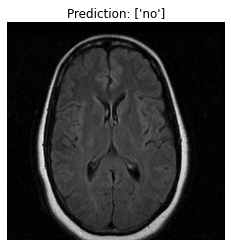

In [ ]:
# Contoh hasil prediksi dengan gambar
pred_class_names(model_tl, "Normal-brain-MRI-003.jpg", class_names)

Berdasarkan hasil diatas, model berhasil melakukan prediksi dengan baik, dimana gambar diatas merupakan hasil CT scan otak yang normal.

--2022-07-21 03:39:52--  https://prod-images-static.radiopaedia.org/images/33573403/778bde0fa1e123d3faca0336652379_big_gallery.jpeg
Resolving prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)... 104.26.8.61, 104.26.9.61, 172.67.72.247, ...
Connecting to prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)|104.26.8.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46871 (46K) [image/jpeg]
Saving to: ‘778bde0fa1e123d3faca0336652379_big_gallery.jpeg.14’

778bde0fa1e123d3fac 100%[===================>]  45.77K  --.-KB/s    in 0.005s  

2022-07-21 03:39:52 (9.39 MB/s) - ‘778bde0fa1e123d3faca0336652379_big_gallery.jpeg.14’ saved [46871/46871]



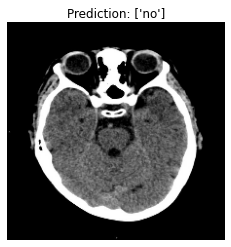

In [ ]:
!wget https://prod-images-static.radiopaedia.org/images/33573403/778bde0fa1e123d3faca0336652379_big_gallery.jpeg
pred_class_names(model_tl,"778bde0fa1e123d3faca0336652379_big_gallery.jpeg", class_names)

Untuk memastikan kita lakukan sekali lagi uji inference dengan mengambil gambar di internet. Sekali lagi, model berhasil memprediksi dengan benar, dimana hasil CT scan diatas adalah CT scan otak yang normal.

Berdasarkan hasil uji inference, model telah berhasil mengkategorikan foto CT scan dengan benar. Dimana kebetulan kedua foto yang dijadikan sebagai data inference adalah foto CT scan normal.

Namun demikian, meskipun model yang dibuat telah memiliki performa yang baik dan berhasil melakukan prediksi rasanya belum bisa berpuas diri. Karena dataset yang digunakan untuk project ini masih terlalu kecil. Sehingga ada kemungkinan model tidak memiliki data yang cukup untuk berlatih dan belum teruji jika harus dites dengan dataset yang lebih besar dengan foto-foto CT scan yang lebih bervariasi. Hal ini tentunya bisa dijadikan catatan untuk future improvement. 

# 11. Conclusion

Terlepas dari jinak atau ganasnya, tumor otak adalah masalah kesehatan yang kompleks. Karena penyakit ini memengaruhi otak yang merupakan organ yang sangat penting bagi kelangsungan hidup manusia. Sehingga sangat penting untuk mendeteksi sedini mungkin tumor otak pada pasien agar dapat dilakukan tindakan yang cepat dan sesuai. 

Saat ini Deep Learning juga sedang terus dikembangkan untuk menjadi alat untuk mendeteksi penyakit, termasuk tumor otak. Project milestone 2 saya terinspirasi hal ini, dimana saya mencoba membuat model prediksi tumor otak sederhana. Secara umum model saya sudah berhasil memprediksi data inference dengan baik. Namun, menurut saya data model ini masih kurang teruji karena dataset yang digunakan masih terlalu kecil. Sehingga ada kemungkinan model hanya memiliki sedikit data untuk berlatih. Untuk kedepannya model masih harus diuji dengan dataset yang lebih besar agar dapat dilatih dengan data yang lebih bervariasi.


Sumber: https://aip.scitation.org/doi/abs/10.1063/5.0082328

# 12. Model Saving

In [ ]:
# Syntax save model dan pipeline preprocessing dijadikan comment agar tidak mengenerate file baru setiap kali notebook dirun ulang
# model_tl.save("tumor")